In [1]:
import pandas as pd
import numpy as np
import re # not really used atm
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler # to scale data
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,auc
from sklearn.model_selection import StratifiedKFold # for cross validation

# NN model
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import SGD #test keras


Using TensorFlow backend.


In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
def check_null(df):
    print('\ncheck null values \n')
    print('shape df: ', df.shape, '\n')
    ok_columns = [col for col in df if df[col].isna().sum() == 0]
    print('ok columns: ', ok_columns, '\n')
    for col in df:
        if df[col].isna().sum() >0:
            print(col, ':', df[col].isna().sum())

In [5]:
df_original = pd.read_csv('../input/output.csv')

In [6]:
df_original.head(3)

,name,flav,truth_match,quark_match,ele_match,PU_frac,jet_pt,jet_eta,n_trk,ValZ0_0,SigZ0_0,ValD0_0,SigD0_0,IP3D_trk_pb_0,IP3D_trk_pu_0,IP3D_trk_pc_0,pt_trk_0,has_time_0,time_0,nhits_0,has_time_truth_0,time_truth_0,nhits_truth_0,ValZ0_1,SigZ0_1,ValD0_1,SigD0_1,IP3D_trk_pb_1,IP3D_trk_pu_1,IP3D_trk_pc_1,...,ValZ0_24,SigZ0_24,ValD0_24,SigD0_24,IP3D_trk_pb_24,IP3D_trk_pu_24,IP3D_trk_pc_24,pt_trk_24,has_time_24,time_24,nhits_24,has_time_truth_24,time_truth_24,nhits_truth_24,IP3Dw,SV1w,JFw,JFCombNNw,Mv2w,Mv1w,IP3DPlusSV1w,has_t0,t0,sigma_t0,has_t0_alex,t0_alex,sigma_t0_alex,has_t0_alex_truth,t0_alex_truth,sigma_t0_alex_truth
0,chiara,5,1,1,0,0,83.3035,2.79517,5,0.462290,39.74930,0.283950,39.74930,0.772943,0.053444,0.173613,22.9957,1,0.042305,2,1,0.041971,2,-0.218200,-15.05000,-0.107653,-15.05000,0.445546,0.192721,0.361732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.926481,-21.0,-41.0,0.866808,-0.783198,0.055535,-0.623519,2,0.057853,0,1,0.038451,0.007462,1,0.035560,0.005466
1,chiara,0,1,1,0,0,55.9409,3.60055,6,0.020639,2.95859,0.001131,2.95859,0.310058,0.310187,0.379754,30.3267,1,0.037086,4,1,0.041971,3,0.029095,1.69636,0.010696,1.69636,0.227965,0.408232,0.363803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,-0.836526,-21.0,-41.0,-4.237590,-0.950782,0.055535,-2.386530,2,0.057853,0,1,0.038451,0.007462,1,0.035560,0.005466
2,chiara,0,0,0,0,0.295327,30.5247,3.95126,6,-1.277080,-47.21200,-0.378989,-47.21200,0.422408,0.208915,0.368677,38.9140,1,-0.107696,3,0,-999.000000,-999,-1.410610,-31.18890,-0.046665,-31.18890,0.268466,0.432518,0.299016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,-1.131970,-21.0,-41.0,-4.352550,-0.921247,0.055535,-2.681970,2,-0.125010,0,1,-0.047239,0.011068,1,-0.059581,0.011667


In [6]:
# remove rows with NaN (originating e.g. from empty lines in input file)
df_original = df_original[df_original['flav'].notna()] 

In [8]:
#check_null(df_original)


check null values 

shape df:  (713471, 375) 

ok columns:  ['name', 'flav', 'truth_match', 'quark_match', 'ele_match', 'PU_frac', 'jet_pt', 'jet_eta', 'n_trk', 'ValZ0_0', 'SigZ0_0', 'ValD0_0', 'SigD0_0', 'IP3D_trk_pb_0', 'IP3D_trk_pu_0', 'IP3D_trk_pc_0', 'pt_trk_0', 'has_time_0', 'time_0', 'nhits_0', 'has_time_truth_0', 'time_truth_0', 'nhits_truth_0', 'ValZ0_1', 'SigZ0_1', 'ValD0_1', 'SigD0_1', 'IP3D_trk_pb_1', 'IP3D_trk_pu_1', 'IP3D_trk_pc_1', 'pt_trk_1', 'has_time_1', 'time_1', 'nhits_1', 'has_time_truth_1', 'time_truth_1', 'nhits_truth_1', 'ValZ0_2', 'SigZ0_2', 'ValD0_2', 'SigD0_2', 'IP3D_trk_pb_2', 'IP3D_trk_pu_2', 'IP3D_trk_pc_2', 'pt_trk_2', 'has_time_2', 'time_2', 'nhits_2', 'has_time_truth_2', 'time_truth_2', 'nhits_truth_2', 'ValZ0_3', 'SigZ0_3', 'ValD0_3', 'SigD0_3', 'IP3D_trk_pb_3', 'IP3D_trk_pu_3', 'IP3D_trk_pc_3', 'pt_trk_3', 'has_time_3', 'time_3', 'nhits_3', 'has_time_truth_3', 'time_truth_3', 'nhits_truth_3', 'ValZ0_4', 'SigZ0_4', 'ValD0_4', 'SigD0_4', 'IP3D_trk_pb_4

In [28]:
# do not consider PU jets
df = df_original[(df_original['truth_match']>0) & (df_original['quark_match']>0)]
# keep jets with pt>20 GeV, 2.5<eta<4
df = df[(df['jet_pt']>20) & (df['jet_eta']>2.5) & (df['jet_eta']<4)]
#df = df_original[(df_original['ele_match']<1)]
# for the moment I want to focus on b-vs-light --> keep only real light and b, and put target to flav=5
df = df[(df['flav']==0) | (df['flav']==5) ]
df['target'] = (df['flav'] == 5 ).astype(int)

In [29]:
df.reset_index(drop=True,inplace=True)

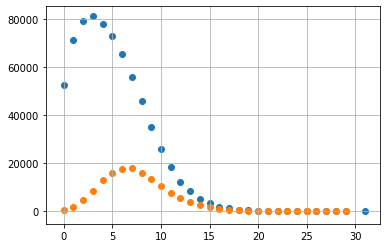

In [30]:
plt.scatter(df_original['n_trk'].value_counts().index, df_original['n_trk'].value_counts())
plt.scatter(df['n_trk'].value_counts().index, df['n_trk'].value_counts())
plt.grid(True)

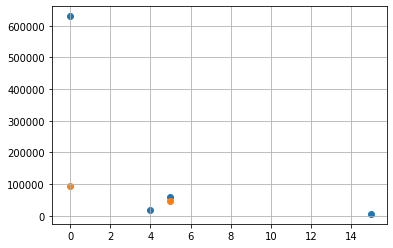

In [31]:
plt.scatter(df_original['flav'].value_counts().index, df_original['flav'].value_counts())
plt.scatter(df['flav'].value_counts().index, df['flav'].value_counts())
plt.grid(True)

In [32]:
# df[['truth_match','quark_match','ele_match']].describe()

In [33]:
# check how many events and the fraction of b-jets
df['target'].describe()

count    141249.000000
mean     0.329142     
std      0.469903     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      1.000000     
max      1.000000     
Name: target, dtype: float64

In [34]:
df = df.replace([-999],[0])

In [35]:
df = df[['flav', 'truth_match', 'quark_match', 'ele_match', 'PU_frac', 'jet_pt', 'jet_eta', 'n_trk']]

In [53]:
df['PU_frac'].fillna(0, inplace=True)

In [54]:
df.describe()

,flav,truth_match,quark_match,ele_match,PU_frac,jet_pt,jet_eta,n_trk
count,141249.000000,141249.0,141249.0,141249.000000,141249.000000,141249.000000,141249.000000,141249.000000
mean,1.645711,1.0,1.0,0.054946,0.126512,58.010272,3.035543,7.313850
std,2.349517,0.0,0.0,0.227875,0.175701,38.866130,0.406307,3.241716
min,0.000000,1.0,1.0,0.000000,0.000000,20.000100,2.500010,0.000000
25%,0.000000,1.0,1.0,0.000000,0.000000,31.442000,2.693230,5.000000
50%,0.000000,1.0,1.0,0.000000,0.062745,46.978800,2.943230,7.000000
75%,5.000000,1.0,1.0,0.000000,0.169378,71.723600,3.345360,9.000000
max,5.000000,1.0,1.0,1.000000,1.000000,611.731000,3.999990,29.000000


In [60]:
df['PU_frac_10'] = df['PU_frac']>0.1

In [66]:
df[['flav','jet_pt', 'jet_eta', 'n_trk','PU_frac','PU_frac_10']].groupby('flav').mean()

,jet_pt,jet_eta,n_trk,PU_frac,PU_frac_10
flav,,,,,
0,59.243952,3.103850,7.086378,0.138655,0.407691
5,55.495785,2.896319,7.777484,0.101760,0.342367


In [67]:
df.to_csv('../output/jet_info.csv')